<a href="https://colab.research.google.com/github/vickyyuan1417/Lab11-Web/blob/master/Copy_of_EE435_PyTorch_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding CNNs from Scratch with Pytorch

In this assignment you will code a famous CNN architecture AlexNet (https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) to classify images from the CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html), which consists of 10 classes of natural images such as vehicles or animals. AlexNet is a landmark architecture because it was one of the first extremely deep CNNs trained on GPUs, and achieved state-of-the-art performance in the ImageNet challenge in 2012. 


A lot of code will already be written to familiarize yourself with PyTorch, but you will have to fill in parts that will apply your knowledge of CNNs. Additionally, there are some numbered questions that you must answer either in a separate document, or in this notebook. Some questions may require you to do a little research. To type in the notebook, you can insert a text cell. 

Let's start by installing PyTorch and the torchvision package below. Due to the size of the network, you will have to run on a GPU. So, click on the Runtime dropdown, then Change Runtime Type, then GPU for the hardware accelerator. 

In [64]:
!pip install pytorch
!pip install torchvision

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-jhot17v_/pytorch_a0a1c57f16d143cf82edbc5aa1310c1b/setup.py'"'"'; __file__='"'"'/tmp/pip-install-jhot17v_/pytorch_a0a1c57f16d143cf82edbc5aa1310c1b/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-dxdv49h0/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs for full command output.


In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


device = torch.device('cuda')
    
print(device)

cuda


### 1. In the following cell, we are employing something called "data augmentation" with random horizontal and vertical flips. So when training data is fed into the network, it is ranadomly transformed. What are advantages of this?
#### Ans: We do "data augmentation" to improve our model perforance by forming new and randomly different examples to train datasets. 

### 2. We normalize with the line transforms.Normalize((0.5,), (0.5,)). What are the benefits of normalizing data? 
#### Ans: The Benefits is to help get data within a range and reduces the skewness which helps learn faster and better.



In [2]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from math import ceil

BATCH_SIZE = 100


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomHorizontalFlip(p=0.5), 
     transforms.RandomVerticalFlip(p=0.5),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

torch.manual_seed(43)
val_size = 10000
train_size = len(trainset) - val_size


train_ds, val_ds = random_split(trainset, [train_size, val_size])
print(len(train_ds), len(val_ds))


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

num_steps =  ceil(len(train_ds) / BATCH_SIZE)
num_steps

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
40000 10000


400

In [7]:
train_loader = torch.utils.data.DataLoader(train_ds, BATCH_SIZE, shuffle=True, drop_last = True)
val_loader = torch.utils.data.DataLoader(val_ds, BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(testset, BATCH_SIZE)

You can insert an integer  into the code trainset[#insert integer] to visualize images from the training set. Some of the images might look weird because they have been randomly flipped according to our data augmentation scheme. 

Label (numeric): 9
Label (textual): truck


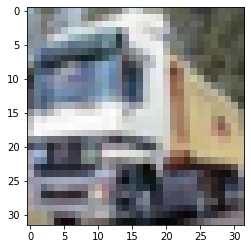

In [19]:
img, label = trainset[1]
plt.imshow((img.permute((1, 2, 0))+1)/2)
print('Label (numeric):', label)
print('Label (textual):', classes[label])

Now comes the fun part. You will have to put in the correct parameters into different torch.nn functions in order to convolve and downsample the image into the correct dimensionality for classification. Think of it as a puzzle. You will insert the parameters where there is a comment #TODO. 

In [80]:
class Discriminator(torch.nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels = 3, #TODO,
                      out_channels = 64, #TODO,
                      kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, 
                      padding= 2 ), #TODO),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d( 192, #TODO, 
                       384, #TODO,
                      kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
            
        #Fully connected layers
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear( 1024, 4096), #TODO 256 * 6 * 6),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096 ),#TODO),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10), #TODO),
        )

    def forward(self, x):
        x = self.features(x)
        #we must flatten our feature maps before feeding into fully connected layers
        x = x.contiguous().view(x.size(0),1024) #TODO 256 * 6 * 6)
        x = self.classifier(x)
        return x

Below we are initializing our model with a weight scheme.

In [86]:
net = Discriminator()

def weights_init(m):

    classname = m.__class__.__name__

    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)

    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0)


# Initialize Models
net = net.to(device)

net.apply(weights_init)



Discriminator(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0

# 3. Notice above in our network architecture, we have what are called "Dropout" layers. What is the point of these?
#### Ans: Dropout layer is to prevent our Alexnet from overfitting, it randomly nullifies some features with a frequency of rate at each step during training time.

Defining our cost/loss function, which is cross-entropy loss. We also define our optimizer with hyperparameters: learning rate and betas. 

In [97]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    net.parameters(),
    lr=0.0005,
    betas = (0.5, 0.999)
)


Below we actually train our network. Run for just 10 epochs. It takes some time. Wherever there is the comment #TODO, you must insert code.

In [99]:
from torch._C import Size
for epoch in range(15):  # loop over the dataset multiple times
    # net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device) #TODO

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs) #TODO     #pass input data into network to get outputs
        loss = criterion(outputs, labels) #TODO)
        loss.backward()  #calculate gradients
        optimizer.step() #take gradient descent step

        
        running_loss += loss.item()
            
    
    print("E:{}, Train Loss:{}".format(
                epoch+1,
                running_loss / num_steps
            )
        )
        
        
        
    #validation
    # net.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            #TODO: load images and labels from validation loader
            images,labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)  #TODO  #run forward pass
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
                
            loss = criterion(outputs, labels)    #TODO       #calculate validation loss
            val_loss += loss.item()
    val_loss /=num_steps
    print('Accuracy of 10000 val images: {}'.format( correct / total))
    print('Val Loss: {}'.format( val_loss))
print('Finished Training')

E:1, Train Loss:0.28755450589582326
Accuracy of 10000 val images: 0.7039
Val Loss: 0.30720687463879587
E:2, Train Loss:0.28394541922956706
Accuracy of 10000 val images: 0.7092
Val Loss: 0.2999604432284832
E:3, Train Loss:0.2628721898794174
Accuracy of 10000 val images: 0.7164
Val Loss: 0.30306818887591364
E:4, Train Loss:0.2654457014426589
Accuracy of 10000 val images: 0.7111
Val Loss: 0.2995715522766113
E:5, Train Loss:0.26098587838932874
Accuracy of 10000 val images: 0.7105
Val Loss: 0.3163650222122669
E:6, Train Loss:0.25220268044620753
Accuracy of 10000 val images: 0.7102
Val Loss: 0.32316431745886803
E:7, Train Loss:0.252556214928627
Accuracy of 10000 val images: 0.7086
Val Loss: 0.33644179597496987
E:8, Train Loss:0.22912811253219842
Accuracy of 10000 val images: 0.7061
Val Loss: 0.33479794919490813
E:9, Train Loss:0.41534125519916415
Accuracy of 10000 val images: 0.7175
Val Loss: 0.28086990922689437
E:10, Train Loss:0.3152038820460439
Accuracy of 10000 val images: 0.7106
Val Los

## 4. If we train for more epochs, our accuracy/performance will increase. What happens if we train for too long though? What method can be employed to mitigate this?
#### Ans: As we increase number of Epochs, the accuracy/perforance will go high and reach a top accuracy/perforance and then go down. This is because lack of train data or model is too complex with millions of parameters. To solve this, we can add l1 or l2 regularizers, or plot the training and validation loss and keeping an eye on how they progress over epochs.

## 5. Try increasing learning rate and look at the metrics for training and validation data? What do you notice? Why do think this is happening?
#### Ans:By increase learning rate within 10 epochs, the accuracy/perforance increases significantly, which means the model is adopted to our problem much more quickly. This is because smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.


We can see the performance on the testing set now. 

In [100]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of 10000 test images: {}'.format( correct / total))

Accuracy of 10000 test images: 0.719
